In [1]:
# for finite automata visualization
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,120 kB of archives.
After this operation, 7,128 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bion

In [2]:
# function to graph given finite automata
def graph(delta,F,Q,q0,connectionstyle='arc3, rad = 0',label_pos=0.7):
  import matplotlib.pyplot as plt
  import networkx as nx
  import numpy as np
  import pydot
  from networkx.drawing.nx_agraph import graphviz_layout
  
  # convert list of characters into strings
  table=[]
  for i in delta:
    if i[1]=='e': table.append([''.join(i[0]),''.join(i[2]),-1])
    else: table.append([''.join(i[0]),''.join(i[2]),int(i[1])])  
  adfa=[]
  for i in F: adfa.append(''.join(i))
  s=[]
  for i in Q: s.append(''.join(i))

  # initialize graph and add all the edges
  G=nx.MultiDiGraph()
  for i in table: G.add_edge(i[0], i[1], weight=i[2] if i[2]!=-1 else 'Ɛ')

  # assign color values to respective nodes
  # by default nodes are yellow
  # green node implies initial node
  # purple node implies initial and final node
  # red nodes imply final nodes
  values=[]
  for i in s:
    if i == ''.join(q0): 
      if i in adfa: values.append('purple')
      else: values.append('green')
    elif i in adfa: values.append('red')
    else: values.append('yellow')

  # get edge and node labels
  edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
  node_labels = {node:node for node in G.nodes()}

  # define graph layout style
  pos=graphviz_layout(G,prog='sfdp')
  # define size of graph image
  plt.figure(figsize=(8,8))
  # define nodes of graph
  nodes = nx.draw_networkx_nodes(G, pos, node_color = values, node_size=1500)
  # define edges of graph
  nodes.set_edgecolor('black')
  nx.draw_networkx_edges(G,pos,arrowstyle = '-|>',arrowsize=20,edge_color='black',edge_cmap=plt.cm.Reds,connectionstyle=connectionstyle, node_size=1500)
  nx.draw_networkx_labels(G, pos, labels=node_labels)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels,label_pos=label_pos)
  # plot graph
  plt.show()  
  
  # the i/p value is closer to the base of the arrow (i.e. closer to start of the edge)

In [3]:
# print a list with given seperator and end string
def print_list(l,s='',e=''):
  #if type(l) in (list(),tuple(),set()): 
  list(l).sort()
  print(*l,sep=s,end=e)

# find and return e-closure of given state
def closure(state):
    s=state
    for i in enfa_delta:
        for j in state:
            if i[0]==j and i[1]=='e': s+=[i[2]]
    s=list(set(s))
    s.sort()
    return s

# find and return next states given state and symbol 
def delta(state,symbol):
    s = []
    for i in enfa_delta:
        if i[0]==state and i[1]==symbol: s+=[i[2]]
    s=list(set(s))
    s.sort()
    return s

# function to find set of acceptance states in DFA using acceptance states of enfa and all states of dfa 
def statesAcceptanceDFA(states,F):
    dfa_F = []
    for f in F:
      for s in states:
        if (f in s) and ((len(dfa_F)==0) or (s not in dfa_F)):
          dfa_F.append(s)
    return dfa_F

# variable to decide if to take input values or use default, pre-filled values
custom = False

# prefilled values to run program without inputting values
nQ=6
enfa_Q = ['A','B','C','D','E','F']
enfa_q0 = 'A'
enfa_F=['F']
nsig=2
dfa_sigma = ['0','1']
ndel=11
enfa_delta=[['A','0','F'],['A','0','C'],['A','e','B'],['A','e','F'],['B','1','C'],['C','e','D'],['D','0','E'],['D','1','A'],['E','0','A'],['E','e','B'],['E','e','F']]

# block of code to input various values
if custom:
  nQ = int(input("Enter the number of states :"))

  enfa_Q = []
  for i in range (nQ):
      enfa_Q += input ("Enter state " + str (i + 1) + " :")

  enfa_q0 = input ("Enter the input states :")

  enfa_F = input("Enter the acceptance states :").split(" ")

  nsig = int(input("Enter the number of symbols (excluding epsilon):"))

  dfa_sigma = []
  for i in range (nsig):
      dfa_sigma += [input ("Enter the symbol #" + str (i + 1) + " :")]

  ndel = int(input("Enter the number of transitions:"))
  
  print (" Enter the transitions in the following format: Input_State Symbol Output_State \n -> In the case of epsilon, write e in the symbol")
  i = 0
  enfa_delta = []
  tran = []
  while (i<ndel):
      tran = input ("Enter the transition #" + str (i + 1) + ":")
      tran = tran.split(" ")
      enfa_delta.append(tran)
      i += 1

print("================================================================== ")
# print parameters of epsilon-nfa
print("eNFA")

enfa_sigma = dfa_sigma.copy()
enfa_sigma += 'e'

print()
print("set of states (Q): {",end='')
print_list(enfa_Q,s=',',e='}\n')
 
print("set of input symbols (∑): {",end='')
print_list(enfa_sigma,s=',',e='}\n')

print("initial state (q0): {",end='')
print_list(enfa_q0,s=',',e='}\n')

print("final states (F): {",end='')
print_list(enfa_F,s=',',e='}\n')

print("Transition function (δ):\n\n\t",end='')

print_list(enfa_sigma,s='\t',e='\n\n')
for i in enfa_Q:
  print(i,end="\t")
  for j in enfa_sigma: 
    d=delta(i,j)
    if d: print_list(d);
    else: print_list('-');
    print("\t",end='');
  print()

print("================================================================== ")

eNFA

set of states (Q): {A,B,C,D,E,F}
set of input symbols (∑): {0,1,e}
initial state (q0): {A}
final states (F): {F}
Transition function (δ):

	0	1	e

A	CF	-	BF	
B	-	C	-	
C	-	-	D	
D	E	A	-	
E	A	-	BF	
F	-	-	-	


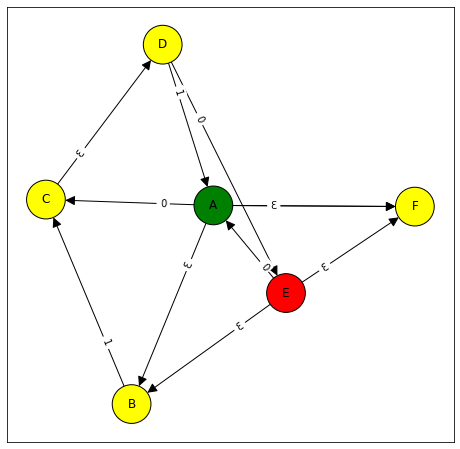

In [4]:
# plot enfa
graph(enfa_delta,enfa_F,enfa_Q,enfa_q0,connectionstyle='arc3, rad = 0')

# the i/p value is closer to the base of the arrow (i.e. closer to start of the edge)

# by default nodes are yellow
# green node implies initial node
# purple node implies initial and final node
# red nodes imply final nodes

In [5]:
print("Epsilon Closures of all states:\n")

# find epsilon-closure of all the states in enfa
for i in enfa_Q:
  print('Ɛ-closure({}) = {{'.format(i),end='')
  print_list(closure([i]),s=',',e='}\n\n')

print("================================================================== ")
# calculate and print parameters of dfa
print("DFA")

dfa_q0 = closure([enfa_q0])
dfa_Q = [dfa_q0]
c = 0
k = 0
dfa_delta = []

while(True):
    # for every symbol in dfa
    for i in dfa_sigma:
        q1 = []
        # find delta of each enfa state in a particular dfa state
        for j in dfa_Q[k]:
            q1 += delta(j,i)
            q1 = list(set(q1))
        # add closure of all deltas as next state
        q1 = closure(q1)
        dfa_delta += [[dfa_Q[k],i,q1]]
        # if the new state is not in dfa_Q the add it
        flag = True
        for j in dfa_Q:
            if j==q1: flag=False;
        if flag:
            dfa_Q += [q1]
            c += 1
    k += 1
    # exit loop if all states are explored
    if k>c: break;

# find set of acceptance states in DFA using acceptance states of enfa and all states of dfa 
dfa_F = statesAcceptanceDFA(dfa_Q,enfa_F) 

print("set of states (Q): {",end='')
for i in range(len(dfa_Q)-1): print_list(dfa_Q[i],e=',');
print_list(dfa_Q[len(dfa_Q)-1],e='}\n')
 
print("set of input symbols (∑): {",end='')
print_list(dfa_sigma,s=',',e='}\n')

print("initial state (q0): {",end='')
print_list(dfa_q0,e='}\n')

print("final states (F): {",end='')
for i in range(len(dfa_F)-1): print_list(dfa_F[i],e=',');
print_list(dfa_F[len(dfa_F)-1],e='}\n')

print("Transition function (δ):\n\n\t",end='')

qi=0
i=0

print_list(dfa_sigma,s='\t',e='\n\n')
while(i<(len(dfa_Q)*len(dfa_sigma))):
    print_list(dfa_Q[qi], e = "\t")

    while (i<(len(dfa_sigma)*(qi+1))):
        print_list(dfa_delta[i][2],e="\t")
        i += 1
    print()
    qi += 1
print("================================================================== ")


Epsilon Closures of all states:

Ɛ-closure(A) = {A,B,F}

Ɛ-closure(B) = {B}

Ɛ-closure(C) = {C,D}

Ɛ-closure(D) = {D}

Ɛ-closure(E) = {B,E,F}

Ɛ-closure(F) = {F}

DFA
set of states (Q): {ABF,CDF,CD,BEF}
set of input symbols (∑): {0,1}
initial state (q0): {ABF}
final states (F): {ABF,CDF,BEF}
Transition function (δ):

	0	1

ABF	CDF	CD	
CDF	BEF	ABF	
CD	BEF	ABF	
BEF	ABF	CD	


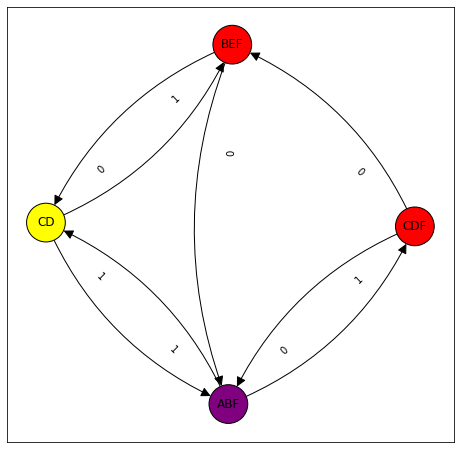

In [6]:
# plot dfa
graph(dfa_delta,dfa_F,dfa_Q,dfa_q0,connectionstyle='arc3, rad = 0.2')

# the i/p value is closer to the base of the arrow (i.e. closer to start of the edge)

# by default nodes are yellow
# green node implies initial node
# purple node implies initial and final node
# red nodes imply final nodes